이 장에서 소개하는 강력한 도구들을 사용하면 복잡한 문제에서도 거의 최고의 성능을 내는 모델을 개발할 수 있습니다. 케라스의 함수형 API를 사용해서 그래프 구조를 띈 모델을 만들거나 하나의 층을 다른 입력에 같이 사용하고, 케라스 모델을 파이썬 함수처럼 사용할 수 있습니다. 케라스 콜백과 브라우저 기반의 시각화 도구인 텐서보드는 훈련하는 동안 모델을 모니터링 하도록 도와줍니다. 배치 정규화, 잔차 연결, 하이퍼파라미터 최적화, 모델 앙상블을 포함한 여러 가지 모범 사례도 살펴보겠습니다.

##Sequential 모델을 넘어서: 케라스의 함수형 API

지금까지 이 책에서 소개한 모든 신경망은 Sequential 모델을 사용하여 만들었습니다. Sequential 모델은 네트워크 입력과 출력이 하나라고 가정합니다. 이 모델은 층을 차례대로 쌓아 구성합니다.

Sequential 모델: 차례대로 쌓은 층

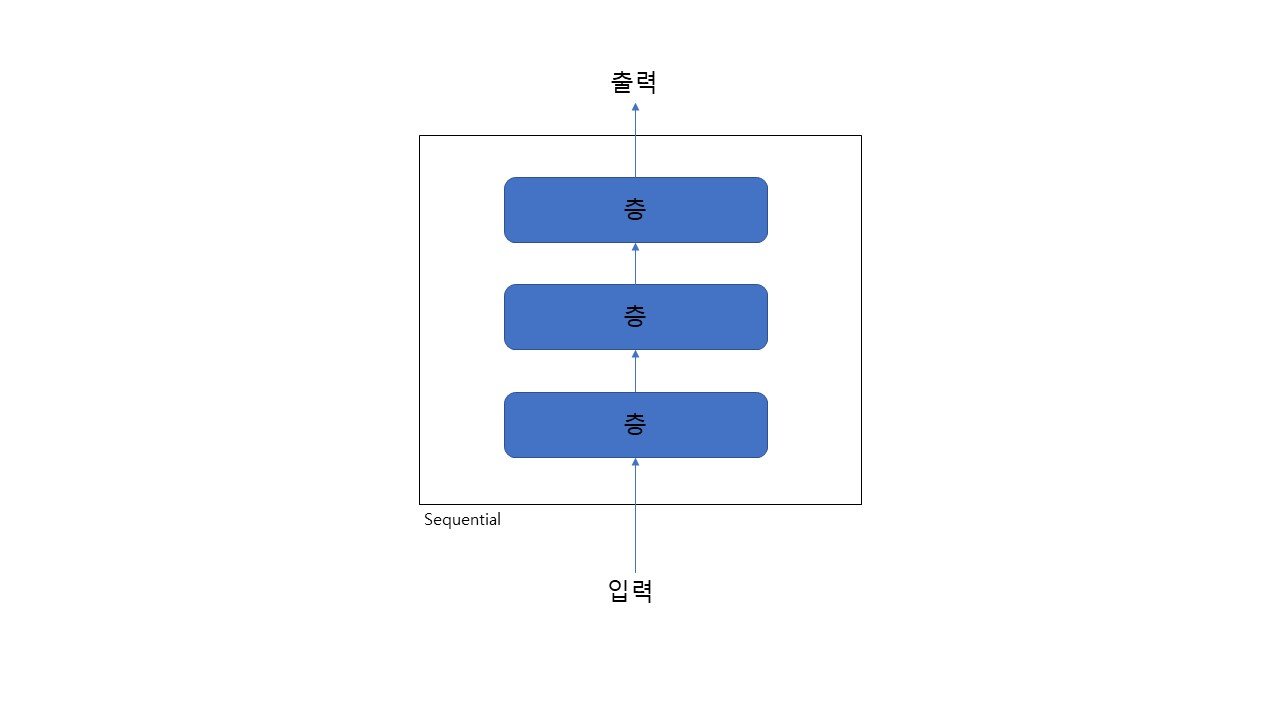

많은 경우에 이런 가정이 적절합니다. 이 책에서는 지금까지 Sequential 모델 클래스만 사용하여 많은 개념과 실제 애플리케이션을 다루었습니다. 하지만 이런 가정이 맞지 않는 경우도 많습니다. 일부 네트워크는 개별 입력이여러 개 필요하거나 출력이 여러 개 필요합니다. 층을 차래대로 쌓지 않고 층 사이를 연결하여 그래프처럼 만드는 네트워크도 있습니다.

에를 들어 어떤 작업은 다양한 종류의 입력이 필요합니다. 다양한 입력 소스에서 전달된 데이터를 다른 종류의 신경망 층을 사용하여 처리하고 합칩니다. 중고 의류 시장 가격을 예측하는 딥러닝 모델을 상상해 보죠. 이 모델은 사용자가 제공한 메타데이터(의류 브랜트, 연도 등), 사용자가 제공한 텍스트 설명, 제품 사진을 입력을 사용합니다. 메타데이터만 있다면 이를 원-핫 인코딩으로 바꾸고 완전 연결 네트워크를 사용하여 가격을 예측할 수 있습니다. 텍스트 설명만 있다면 RNN이나 1D 컨브넷을 사용할 수 있습니다. 사진 이미지만 있다면 2D 컨브넷을 사용할 수 있습니다. 사진  이미지만 있다면 2D컨브넷을 사용할 수 있습니다. 이 세 모델을 동시에 모두 사용할 수 있을까요? 간단한 방법은 3개의 모델을 따로 훈련하고 각 예측을 가중 평균하는 것입니다. 각 모델에서 추출한 정보가 중복된다면 이 방식은 최적이 아닐 것입니다. 가능한 모든 종류의 입력 데이터를 동시에 사용해서 정확한 하나의 모델을 학습하는 것이 더 나은 방법입니다. 이 모델은 3개의 입력 가지가 필요합니다.

다중 입력 모델


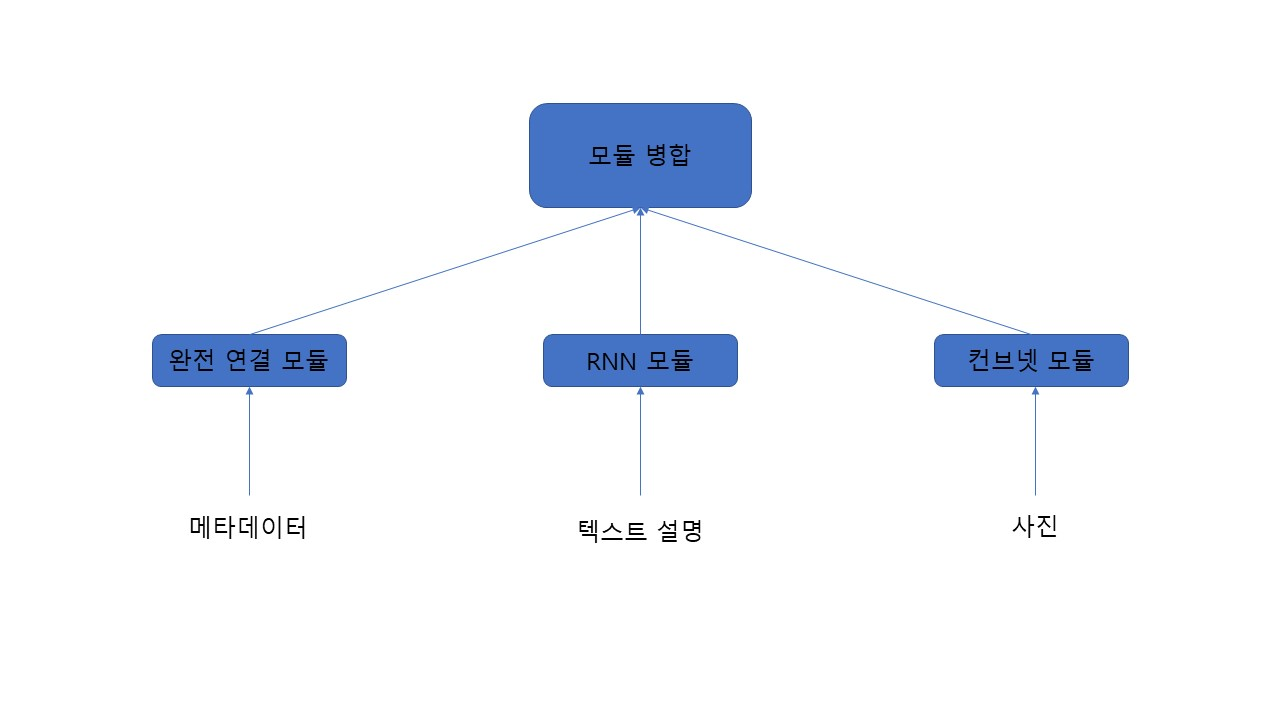

이와 비슷하게 어떤 작업은 입력 데이터에서 여러 개의 타깃 속성을 예측해야 합니다. 예를 들어 소설이나 짧은 글이 있을 떄 자동으로 장르별로 분류하려고 합니다(로맨스나 스릴러 등). 또 글을 쓴 대략의 시대를 예측해야 합니다. 물론 2개의 모델을 따로 훈련할 수 있습니다. 장르를 위한 모델과 시대를 위한 모델입니다. 하지만 이 소성들은 통계적으로 독립적이지 않기 때문에 동시에 장르와 시대를 함께 예측하도록 학습해야 더 좋은 모델을 만들 수 있습니다. 이 모델은 2개의 출력 또는 머리를 가집니다. 장르와 시대 사이의 상관관계 때문에 소설 시대를 알면 장르의 공간에서 정확하고 풍부한 표현을 학습하는 데 도움이 됩니다. 그 반대도 마찬가지입니다.

다중출력 모델

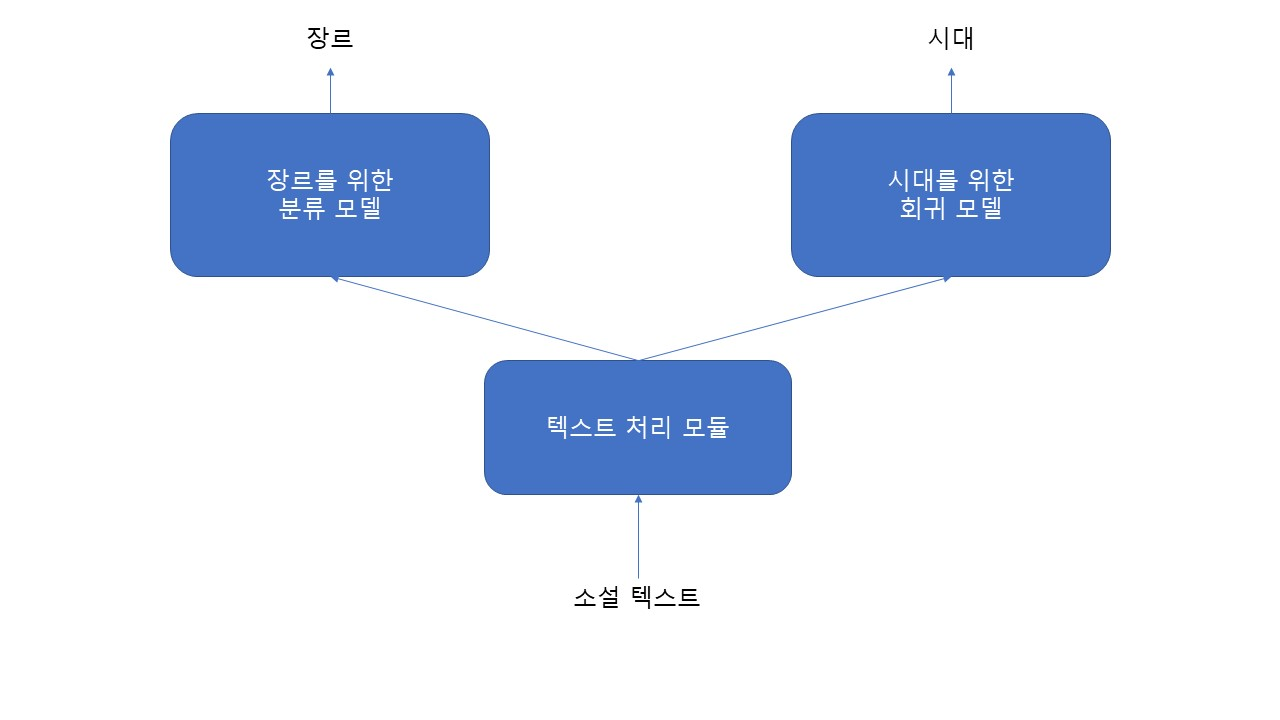

더불어 최근에 개발된 많은 신경망 구조는 선형적이지 않은 네트워크 토폴로지가 필요합니다. 비순환 유향 그래프 같은 네트워크 구조입니다. 예를들어(구글의 세게디 등이 개발한) 인셉션 모듈을 사용하는 인셉션 계열의 네트워크들입니다. 이 모듈에서 입력은 나란히 놓인 여러개의 합성곱 층을 거쳐 하나의 텐서로 출력이 합쳐집니다.

인셉션 모듈: 나란히 놓인 합성곱 층으로 구성된 서브그래프

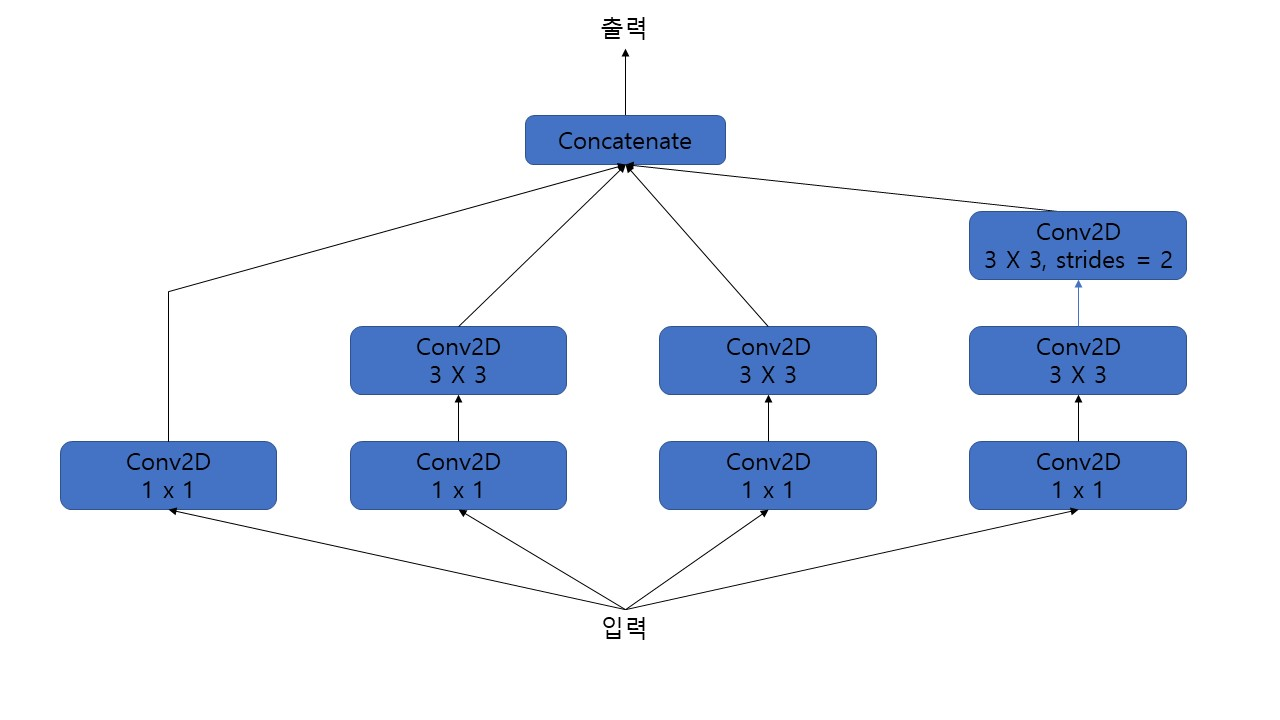

최근에는 모델이 잔차 연결을 추가하는 경향도 있습니다. (마이크로소프트의 허 등이 개발한) ResNet 계열의 네트워크들이 이런 방식을 사용하기 시작했습니다. 잔차 연결은 하위 층의 출력 텐서를 상위 층의 출력 텐서에 더해서 아래층의 표현이 네트워크 위쪽으로 흘러갈 수 있도록 합니다. 하위 층에서 학습된 정보가 데이터 처리 과정에서 손실되는 것을 방지합니다. 이렇게 그래프 구조를 띤 네트워크 종류가 많습니다.

 잔차 연결: 하위 층의 출력을 상위 층의 특성 맵에 더한다.

 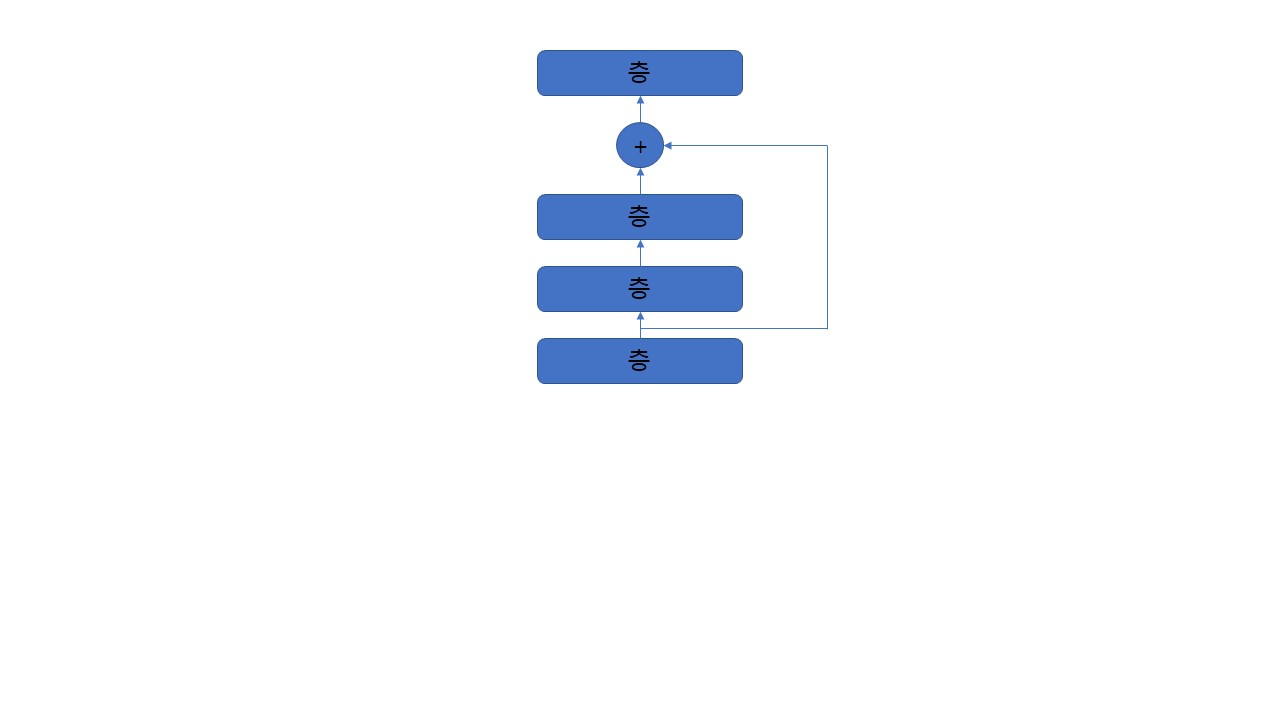

여러 경우에 다중 입력 모델, 다중 출력 모델, 그래프 구조를 띤 모델이 필요하지만 케라스의 Sequential 클래스를 사용해서는 만들지 못합니다. 케라스에는 훨씬 더 일반적이고 유연한 다른 방법인 함수형 API가 있습니다. 이 절에서 함수형 API가 무엇인지 소개하고 함수형 API를 사용하는 방법과 이를 사용하여 할 수 있는 것을 자세히 설명하겠습니다.

##함수형 API 소개

함수형 API에서는 직접 텐서들의 입출력을 다룹니다. 함수처럼 층을 사용하여 테ㄴ서를 입력 받고 출력합니다(그래서 함수형 API라고 부릅니다

In [ ]:
from keras import Input, layers

input_tensor = Input, layers

input_tensor = Input(shape = (32,))  #텐서
dense = layers.Dense(32, activation = 'relu')    #함수처럼 사용하기 위해 층 객체를 만듭니다.

output_tensor = dense(input_tensor)   #텐서와 함께 층을 호출하면 텐서를 반환합니다.

간단한 예를 통해 Sequential 모델과 함수형 API로 만든 동일한 모델을 나란히 비교해 보겠습니다.

In [ ]:
from keras.models import Sequential, Model
from keras import layers
from keras import Input

seq_model = Sequential()   #익숙한 Sequential 모델입니다.
seq_model.add(layers.Dense(32, activation = 'relu', input_shape = (64,)))
seq_model.add(layers.Dense(32, activation = 'relu'))
seq_model.add(layers.Dense(10, activation='softmax'))

#함수형 API로 만든 모델입니다.
input_tensor = Input(shape=(64,))
x = layers.Dense(32, activation = 'relu')(input_tensor)
x = layers.Dense(32, activation = 'relu')(x)
output_tensor = layers.Dense(10, activation = 'softmax')(x)

model = Model(input_tensor, output_tensor) #입려고가 출력 텐서를 지정하여 Model 클래스의 객체를 만듭니다.

model.summary()  #모델 구조 확인

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 64)]              0         
_________________________________________________________________
dense_4 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_5 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_6 (Dense)              (None, 10)                330       
Total params: 3,466
Trainable params: 3,466
Non-trainable params: 0
_________________________________________________________________


입력 텐서와 출력 텐서만 가지고 Model 객체를 만드는 부분이 조금 마술처럼 보입니다. 무대 뒤에서 케라스는 input_tensor에서 output_tensor로 가는 데 필요한 모든 층을 추출합니다. 그다음 이들을 모아 그래프 데이터 구조인 Model 객체를 만듭니다. 물론 input_tensor를 반복 변환하여 output_tensor를 만들 수 있어야 됩니다. 관련되지 않는 입력과 출력으로 모델을 만들면 RuntimeError가 발생합니다.

In [ ]:
unrelated_input = Input(shape = (32,))
bad_model = model = Model(unrelated_input, output_tensor)

ValueError: ignored

이 에러는 케라스가 출력 텐서에서 input_1 텐서로 다다를 수 없다는 뜻입니다.

Model 객체를 사용한 컴파일, 훈련, 평가 API는 Sequential 클래스와 같습니다.

In [ ]:
model.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy')   #모델을 컴파일 합니다.
import numpy as np
x_train = np.random.random((1000, 64))
y_train = np.random.random((1000, 10))

model.fit(x_train, y_train, epochs = 10, batch_size = 128)   #열번 에포크 동안 모델을 훈련합니다.

score = model.evaluate(x_train, y_train)   #모델을 평가합니다.

Epoch 1/10
8/8 [==============================] - 13s 2ms/step - loss: 11.5722
Epoch 2/10
8/8 [==============================] - 0s 3ms/step - loss: 11.6776
Epoch 3/10
8/8 [==============================] - 0s 2ms/step - loss: 12.2782
Epoch 4/10
8/8 [==============================] - 0s 2ms/step - loss: 12.9260
Epoch 5/10
8/8 [==============================] - 0s 2ms/step - loss: 13.8785
Epoch 6/10
8/8 [==============================] - 0s 2ms/step - loss: 15.0774
Epoch 7/10
8/8 [==============================] - 0s 2ms/step - loss: 16.3331
Epoch 8/10
8/8 [==============================] - 0s 3ms/step - loss: 18.0386
Epoch 9/10
8/8 [==============================] - 0s 2ms/step - loss: 19.6080
Epoch 10/10
32/32 [==============================] - 0s 1ms/step - loss: 22.2781


## 다중 입력 모델

함수형 API는 다중 입력 모델을 만드는 데 사용할 수 있습니다. 일반적으로 이런 모델은 서로 다른 입력 가지를 합치기 위해 여러 텐서를 연결할 수 있는 층을 사용합니다. 텐서를 더하거나 이어 붙이는 식입니다. 이와 관련된 케라스의 함수는 keras.layers.add, keras.layers.concatenate 등입니다. 아주 간단한 다중 입력 모델을 살펴보겠습니다. 질문-응답 모델입니다.

전형적인 질문-응답 모델은 2개의 입력을 가집니다. 하나는 자연어 질문이고, 또 하나는 답변에 필요한 정보가 담겨 있는 텍스트(예를 들어 뉴스 기사)입니다. 그래면 모델은 답을 출력해야 합니다. 가장 간단한 구조는 미리 정의한 어휘 사전에서 소프트맥스 함수를 통해 한 단어로 된 답을 출력하는 것입니다.

질문-응답 모델

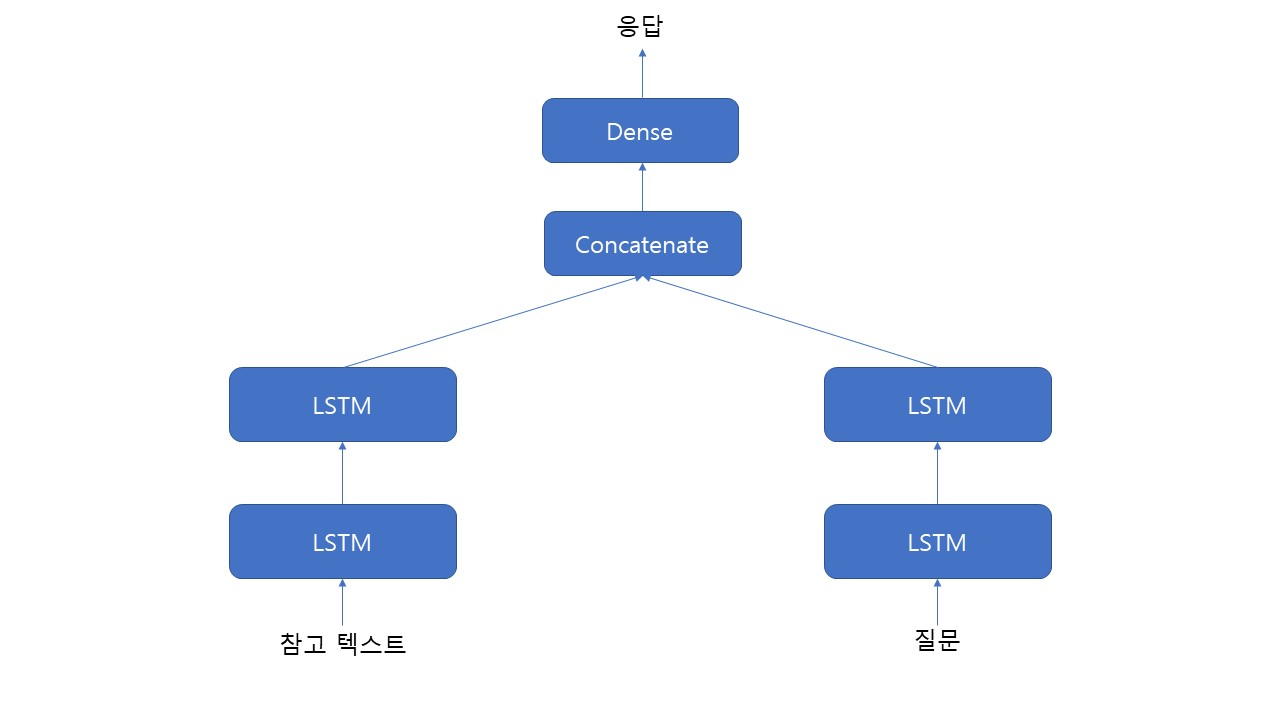

다음은 함수형 API를 사용하여 이런 모델을 만드는 예입니다. 텍스트와 질문을 벡터로 인코딩하여 독립된 입력 2개를 정의합니다. 그다음 이 벡터를 연결하고 그 위에 소프트맥스 분류기를 추가합니다.

In [ ]:
from keras.models import Model
from keras import layers
from keras import Input

text_vocabulary_size = 10000
question_vocabulary_size = 10000
answer_vocabulary_size = 500

text_input = Input(shape = (None,), dtype = 'int32', name = 'text') # 텍스트 입력은 길이가 정해지지 않은 정수 시퀸스입니다. 입력 이름을 지정할 수 있습니다.

embedded_text = layers.Embedding(
    text_vocabulary_size, 64)(text_input) # 입력을 크기가 64인 벡터의 시퀸스로 임베딩합니다.

encoded_text = layers.LSTM(32)(embedded_text)  #LSTM을 사용하여 이 벡터들을 하나의 벡터로 인코딩합니다.

question_input = Input(shape = (None,),
                       dtype = 'int32',
                       name = 'question')   #질문도 동일한 과정을 거칩니다(층 객체는 다릅니다)
embedded_question = layers.Embedding(
    question_vocabulary_size, 32)(question_input)
encoded_question = layers.LSTM(16)(embedded_question)

concatenated = layers.concatenate([encoded_text, encoded_question], axis = -1) #인코딩된 질문과 텍스트를 연결합니다.

answer = layers.Dense(answer_vocabulary_size, activation='softmax')(concatenated)  #소프트맥스 분류기를 추가합니다.

model = Model([text_input, question_input], answer)  #모델 객체를 만들고 2개의 입력과 출력을 주입합니다.
model.compile(optimizer='rmsprop',
              loss = 'categorical_crossentropy',
              metrics = ['acc'])

그럼 이렇게 입력이 2개인 모델은 어떻게 훈련할까요? 두 가지 방식이 있습니다. 넘파이 배열의 리스트를 주입하거나 입력 이름과 넘파이 배열로 이루어진 딕셔너리를 모델의 입력으로 주입할 수 있습니다. 당연하게 두 번째 방식은 입력 이름을 설정했을 때 사용할 수 있습니다.

In [ ]:
import numpy as np
from tensorflow.keras.utils import to_categorical

num_samples = 1000
max_length = 100

text = np.random.randint(1, text_vocabulary_size,
                         size = (num_samples, max_length))  #랜덤한 넘파이 데이터를 생성합니다.
question = np.random.randint(1, question_vocabulary_size,
                             size = (num_samples, max_length))

answers = np.random.randint(0, answer_vocabulary_size, size = num_samples)

answers = to_categorical(answers)  #답은 정수가 아닌 원-핫 인코딩된 벡터입니다.

model.fit([text, question], answers, epochs = 10, batch_size = 128)  #리스트 입력을 사용하여 학습합니다.

model.fit({'text': text, 'question' : question}, answers,
          epochs = 10, batch_size = 128)   #딕셔너리 입력을 사용하여 학습합니다(입력 이름을 지정했을 떄만 사용할 수 있습니다.)

Epoch 1/10
8/8 [==============================] - 10s 124ms/step - loss: 6.2143 - acc: 0.0090
Epoch 2/10
8/8 [==============================] - 1s 130ms/step - loss: 6.1977 - acc: 0.0353
Epoch 3/10
8/8 [==============================] - 1s 121ms/step - loss: 6.1536 - acc: 0.0095
Epoch 4/10
8/8 [==============================] - 1s 120ms/step - loss: 6.0405 - acc: 0.0081
Epoch 5/10
8/8 [==============================] - 1s 123ms/step - loss: 5.9788 - acc: 0.0058
Epoch 6/10
8/8 [==============================] - 1s 123ms/step - loss: 5.9273 - acc: 0.0068
Epoch 7/10
8/8 [==============================] - 1s 125ms/step - loss: 5.8333 - acc: 0.0127
Epoch 8/10
8/8 [==============================] - 1s 125ms/step - loss: 5.7436 - acc: 0.0199
Epoch 9/10
8/8 [==============================] - 1s 128ms/step - loss: 5.6554 - acc: 0.0290
Epoch 10/10
8/8 [==============================] - 1s 122ms/step - loss: 5.5818 - acc: 0.0272
Epoch 1/10
8/8 [==============================] - 3s 124ms/step - lo

손실 값이 많이 불균형하면 모델이 개별 손실이 가장 큰 작업에 치우쳐 표현을 최적화할 것입니다. 그 결과 다른 작업들은 손해를 입습니다. 이를 해결하기 위해 손실 값이 최종 손실에 기여하는 수준을 지정할 수 있습니다. 특히 손실 값의 스케일이 다를 때 유용합니다. 예를 들어 다음과 같이 가정해 보죠. 나이 회귀 작업에 사용되는 평균 제곱 오차 손실은 일반적으로 3~5 사이의 값을 가집니다. 반면에 성별 분류 작업에 사용되는 ㅡ로스 엔트로피 손실은 0.1정도로 낮습니다. 이런 환경에서 손실에 균형을 맞추려면 크로스 엔트로피 손실에 가중치 10을 주고 MSE 손실에 가중치 0.25를 줄 수 있습니다.

In [ ]:
model.compile(optimizer = 'rmsprop',
              loss = ['mse', 'categorical_crossentropy', 'binary_crossentropy'],
              loss_weights = [0.25, 1., 10.])

#위와 동일합니다(출력 층에 이름을 지정했을 떄만 사용할 수 있습니다).
model.compile(optimizer= 'rmsprop',
              loss = {'age' : 'mse',
                      'imcome' : 'categorical_crossentropy',
                      'gender' : 'binary_crossentropy'},
              loss_weights = {'age' : 0.25,
                              'income' : 1.,
                              'gender' : 10.})

다중 입력 모델과 마찬가지로 넘파이 배열의 리스트나 딕셔너리를 모델에 전달하여 훈련합니다.

In [ ]:
model.fit(posts, [age_targets, income_targets, gender_targets],
          epochs = 10, batch_size = 64)

model.fit(posts,{'age' : age_targets,
                 'income' : income_targets,
                 'gender' : gender_targets},
          epochs = 10, batch_size = 64)

NameError: ignored

## 층으로 구성된 비순환 유향 그래프

함수형 API를 사용하면 다중 입력이나 다중 출력 모델뿐만 아니라 내부 토폴로지가 복잡한 네트워크도 만들 수 있습니다. 케라스의 신경망은 층으로 구성된 어떤 비순환 유향 그래프도 만들 수 있습니다. 비순환이라는 것이 중요합니다. 다시 말해 이 그래프는 원형을 띨 수 없습니다. 텐서 x가 자기 자신을 츨력하는 층의 입력이 될 수 없스비다. 만들 수 있는 루프(즉 순환 연결)는 순환층의 내부에 있는 것뿐입니다.

그래프로 구현된 몇 개의 신경망 컴포넌트가 널리 사용됩니다.가장 유명한 2개는 인셉션 모듈과 잔차 연결입니다. 케라스에서 이 2개의 컴포넌트를 어떻게 구현하는지 살펴보겠습니다. 함수형 API를 사용하여 층의 그래프를 만드는 방법을 이해하는 데 도움이 될 것입니다.

# 인셉션 모듈

인셉션은 합성곱 신경망에서 인기 있는 네트워크 구조입니다. 일찍이 네트워크 안의 네트워크 구조에서영감을 받아 2013 ~ 2014년에 크리스티안 세게디와 그의 구글 동료들이 만들었습니다. 나란히 분리된 가지를 따라 모듈을 쌓아 독립된 작은 네트워크처럼 구성합니다. 가장 기본적인 인셉션 모듈 형태는 3~4개의 가지를 가집니다. 1*
1 합성곱으로 시작해서 3*
3합성곱이 뒤따르고 마지막에 전체 출력 특성이 합쳐집니다. 이런 구성은 네트워크가 따로따로 공간 특성과 채널 방향의 특성을 학습하도록 돕습니다 한꺼번에 학습하는 것보다 효과가 더 높습니다. 더 복잡한 인셉션 모듈은 풀링 연산, 여러 가지 합성곱 사이즈, 공간 합성곱이 없는 가지(1*1 합성곱만 있습니다)로 구성될 수 있습니다. 인셉션 V3에 있는 이런 모듈의 예를 밑에 나타내었습니다,

##인셉션 모듈

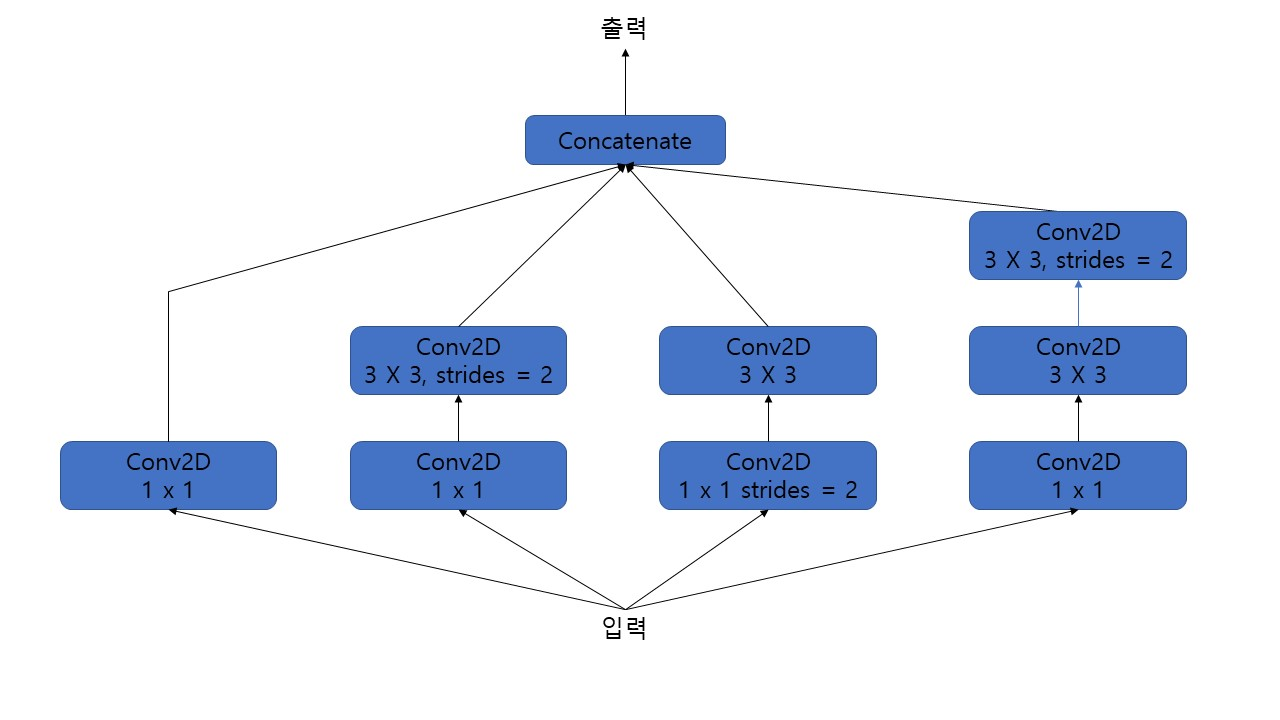

다음은 함수형 API를 사용하여 위의 모듈을 구현하는 예입니다. 이 예에서 입력 x는 4D텐서라고 가정합니다.

In [ ]:
from keras import layers
branch_a = layers.Conv2D(128, 1,activation = 'relu', strides = 2)(x) #모든 가지는 동일한 스트라이드(2)를 사용합니다. 출력 크기를 동일하게 만들어 하나로 합치기 위해서입니다.

branch_b = layers.Conv2D(128, 1, activation = 'relu')(x)
branch_b = layers.Conv2D(128, 3, activation = 'relu', strides =2)(branch_b)  #이 가지에서는 두 번째 합성곱 층에서 스트라이드를 적용합니다.

branch_c = layers.AveragePooling2D(3, strides = 2)(x)
branch_c = layers.Conv2D(128, 3, activation='relu')(branc_c)

branch_d = layers.Conv2D(128, 1, activation = 'relu')(x)
branch_d = layers.Conv2D(128, 3, activation = 'relu')(branch_d)
branch_d = layers.Conv2D(128, 3, activation = 'relu', strides=2)(branch_d)
output = layers.concatenate(
    [branch_a, branch_b, branch_c, branch_d], axis = -1  #모든 가지의 출력을 연결하여 모듈의 출력을 만듭니다.

인셉션 V3 전체 구조는 케라스의 keras.applications.inception_v3.InceptionV3에 준비되어 있으며, ImageNet 데이터셋에서 사전 훈련된 가중치를 포함하고 있습니다. 이와 아주 비슷한 무델인 엑셉션도 케라스의 애플리케이션 모듈에 포함되어 있습니다. 엑셉션은 극단적인 인셉션을 말합니다. 이 합성곱 구조는 인셉션에서 일부 영감을 덩었습니다. 채널 방향의 학습과 공간 방향의 학습을 극단적으로 분리한다는 아이디어에 착안하여 인셉션 모듈을 깊이별 분리 합성곱으로 바꿉니다. 이 합성곱은 깊이별 합성곱(각 입력 채널에 따로따로 적용되는 공간 방향 합성곱) 다음에 점별 합성곱(1*1합성곱)이 따릅니다. 인셉션 모듈의 극한 형태로 공간 특성과 채널 방향 특성을 완전히 분리합니다. 엑셉션은 인셉션 V3와 거의 동일한 개수의 모델 파라미터를 가지지만 실행속도가 더 빠르고 ImageNet이나 다른 대규모 데이터셋에서 정확도가 더 높습니다. 이는 모델 파라미터를 더 효율적으로 사용하기 떄문입니다.

#잔차 연결

잔차연결은 엑셉션을 포함하여 2015년 이후 등장한 많은 네트워크 구조에 있는 그래프 형태의 네트워크 컴포넌트입니다. 2015년 이후 등장한 많은 네트워크 구조에 있는 그래프 형태의 네트워크 컴포넌트입니다. 2015년 후반 ILSVRC ImageNet 경연 대회 우승팀인 마이크로소프트의 허 등이 소개했습니다. 대규모 딥러닝 모델에서 흔히 나타나는 두 가지 문제인 그래디언트 소실과 표현 병목을 해결했습니다. 일반적으로 10개 층 이상을 가진 모델에 잔차 연결을 추가하면 도움이 됩니다.

잔차 연결은 하위 츠의 출력을 상위 층의 입력을 사용합니다. 순서대로 놓인 네트워크를 질러가는 연결이 만들어집니다. 하위층의 출력이 상위 층의 활성화 출력에 연결되는 것이 아닉 더해집니다. 따라서 두 출력의 크기가 동일해야 합니다. 크기가 다르면 선형 변환을 사용하여 하위 층의 활서화 출력을 목표 크기로 변환합니다(예를 들어 활성화 함수를 사용하지 않는 Dense 층이나 합성곱의 특성 맵이라면 활성화 함수가 없는 1*1 합성곱).

다음 코드는 케라스에서 특성 맵의 크기가 같을 때 원본을 그대로 사용하는 잔차 연결을 구현한 예입니다. 여기서는 입력 x가 4D텐서라고 가정합니다.

In [ ]:
from keras import layers
x = ...
y = layers.Conv2D(128, 3, activation = 'relu', padding = 'same')(x)   #x에 어떤 변환을 적용합니다,
y = layers.Conv2D(128, 3, activation = 'relu', padding = 'same')(y)
y = layers.Conv2D(128, 3, activation = 'relu', padding = 'same')(y)

y = layers.add([y,x])  #원본 x를 출력 특성에 더합니다.

다음은 특성 맵의 크기가 다를 때 선형 변환을 사용하여 잔차 연결을 구현한 예입니다(여기에서도 입력 x가 4D텐서라고 가정합니다).

In [ ]:
from keras import layers
x = ...
y = layers.Conv2D(128, 3, activation = 'relu', padding = 'same')(x)   #x에 어떤 변환을 적용합니다,
y = layers.Conv2D(128, 3, activation = 'relu', padding = 'same')(y)
y = layers.MaxPooling2D(2,strides = 2)(y)

residual = layers.Conv2D(128, 1, strides = 2, padding='same')(x)#y와 크기를 맞추기 위해 1*1 합성곱을 사용하여 원본 텐서 x를 다운샘플링합니다.

y = layers.add([y, residual])  #다운샘플링된 x를 출력 특성에 더합니다.

##층 가중치 공유

함수형 API의 중요한 또 하나의 기능은 층 객체를 여러 번 재사용할 수 있다는 것입니다. 층 객체를 두 번 호출하면 새로운 층 객체를 만들지 않고 각 호출에 동일한 가중치를 재사용합니다. 이런 기능 때문에 공유 가지를 가진 모델을 만들 수 있습니다. 이런 가지는 같은 갖ㅇ치를 공유하고 같은 연산을 수행합니다. 다시 말해 같은 표현을 공유하고 이런 표현을 다른 입력에서 함께 학습합니다.

예를 들어 두 문장 사이의 의미가 비슷한지 측정하는 모델을 가정해 보죠. 이 모델은 2개의 입력(비교할 2개의 문장)을 받고 0과 1 사이의 점수를 출력합니다. 0은 관련 없는 문장을 의미하고 1은 두 문장이 동일하거나 재구성되었다는 것을 의미합니다. 이런 모델은 대화 시스템에서 자연어 질의에 대한 중복 제거를 포함하여 많은 애플리케이션에서 유용하게 사용될 수 있습니다.

이런 문제에서는 두 입력 시퀸스가 바뀔 수 있습니다. 의미가 비슷하다는 것은 대칭적인 관계이기 때문입니다. A에서 B에 대한 유사도는 B에서 A에 대한 유사도와 같습니다.이런 이유 때문에 각 입력 문장을 처리하는 2개의 독립된 모델을 학습하는 것은 이치에 맞지 않습니다. 그 대신 하나의 LSTM 층으로 양쪽을 모두 처리하는 것이 좋습니다. 이 LSTM 층의 표현(가중치)은 두 입력에 대해 함께 학습됩니다. 이를 샴 LSTM 모델 또는 공유 LSTM이라고 부릅니다.

다음은 케라스의 함수형 API로 공유 층(재사용 층)을 사용하는 모델을 구현하는 예입니다.

In [ ]:
from keras import layers
from keras import Input
from keras.models import Model

lstm = layers.LSTM(32)  # LSTM층 객체 하나를 만듭니다.

#모델의 오른쪽 가지를 구성합니다. 기존 층 객체를 호출하면 가중치가 재사용됩니다.
left_input = Input(shape=(None, 128))
left_output = lstm(left_input)

#모델의 오른쪽 가지를 구성합니다. 기존 층 객체를 호출하면 가중치가 재사용됩니다.
right_input = Input(shape = (None, 128))
right_output = lstm(right_input)

#맨 위에 분류기를 놓습니다.
merged = layers.concatenate([left_output, right_output], axis = -1)
predictions = layers.Dense(1, activation = 'sigmoid')(merged)

#모델 객체를 만들고 훈련합니다. 이런 모델을 훈련하면 LSTM 층의 가중치는 양쪽 입력을 바탕으로 업데이트됩니다.
model = Model([left_input, right_input], predictions)
model.fit([left_data, right_data], targts)

당연하게 층 객체는 한 번 이상 사용할 수 있습니다. 같은 가중치를 재사용하면서 얼마든지 여러번 호출할 수 있습니다. 같은 가중치를 재사용하면서 얼마든지 여러번 호출할 수 있습니다.



## 층과 모델

함수형 API에서는 모델을 층처럼 사용할 수 있습니다. 모델을 '커다란 층'으로 생각해도 됩니다 Sequential 클래스와 Model 클래스에서 모두 동일합니다. 이 말은 입력 텐서로 모델을 호출해서 출력 텐서를 얻을 수 잇다느 뜻입니다.

In [ ]:
y = model(x)

모델에서 입력 텐서와 출력 텐서가 여러 개이면 텐서의 리스트로 호출합니다.

In [ ]:
y1, y2 = model([x1, x2])

모델 객체를 호출할 때 모델의 가중치가 재사용됩니다. ㅡㅇ 객체를 호출할 때와 정확히 같습니다. 층 객체나 모델 객체나 객체를 호출하는 것은 항상 그 객체가 가진 학습된 표현을 재사용합니다. 모델 객체를 재사용하는 간단한 실전 예는 듀얼 카메라에서 입력을 받는 비전 모델입니다. 두 카메라가 몇 센치미터 간격을 두고 나란히 있습니다. 일ㄴ 모델은 깊이를 감지할 수 있습니다. 많은 애플리케이션에서 유용한 기능입니다. 왼쪽 카메라와 오른쪽 카메라에서 시각적 특징을 추출하여 합치기 위해 2개의 독립된 모델을 사용할 필요가 없습니다. 두 입력에 저수준 처리과정이 공유될 수 있습니다. 다시 말해 가중치가 같고 동일한 표현을 공유하는 층을 사용합니다. 다음은 케라스에서 샴 비전 모델(공유 합성곱 기반 층)을 구현하는 예입니다.

In [ ]:
from keras import layers
from keras import applications
from keras import Input

#이미지 처리 기본 모델은 엑셉션 네트워크입니다(합성곱 기반 층만 사용합니다).
xcption_base = applications.Xception(weights = None,
                                     include_top = False)

#입력은 250 * 250 RGB 이미지입니다.
left_input = Input(shape = (250, 250, 3))
right_input = Input(shape = (250, 250, 3))

#같은 비전 모델을 두 번 호출합니다.
left_features = xception_base(left_input)
right_features = xception_base(right_input)

#합쳐진 특성은 오른쪽 입력과 왼쪽 입력에서 얻은 정보를 담고 있습니다.
merged_features = layers.concatenate(
    [left_features, right_features], axis = -1
)

#Xception 네트워크가 업데이트 하면서 빠졌나 봅니다.

##정리

이것으로 케라스의 함수형 API 소개를 마칩니다. 이는 고급 심층 신경망 구조를 구축하기 위해 필수적인 도구입니다. 여기에서 다음 내용을 배웠습니다.

 * 차례대로 층을 쌓는 것 이상이 필요할 때는 Sequential API를 사용하지 않습니다.
 * 함수형 API를 사용하여 다중 입력, 다중 출력, 복잡한 네트워크 토폴리지를 갖는 케라스 모델을 만드는 방법

 * 다른 네트워크 가지에서 같은 층이나 모델 객체를 여러 번 호출하여 가중치를 재사용하는 방법